In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [122]:
data_path = Path("../data/processed/feature_data.csv")
df=pd.read_csv(data_path,dtype='float32')

In [123]:
df['readmitted'].value_counts(normalize=True)


readmitted
0.0    0.539119
1.0    0.460881
Name: proportion, dtype: float64

In [124]:
cat_cols = [col for col in df.columns if df[col].nunique() < 20 and df[col].dtype in ['int64', 'object']]


In [125]:
x=df.drop(columns=['readmitted'],axis=1)
y=df['readmitted']

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [127]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [128]:
model.score(x_test, y_test)  

0.6078412105728603

In [129]:

model=XGBClassifier()
params = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.9, 1],
    'gamma': [0, 0.2, 1],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}


In [130]:
from sklearn.model_selection import RandomizedSearchCV

# Sanitize column names for XGBoost compatibility
x_train.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in x_train.columns]
x_test.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in x_test.columns]

score = []
for model_name, mp in mod_params.items():
    clf = RandomizedSearchCV(mp['model'], mp['params'], cv=5, scoring='roc_auc', n_iter=25, verbose=1, n_jobs=-1)
    clf.fit(x_train, y_train)
    score.append({
       
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })


Fitting 5 folds for each of 25 candidates, totalling 125 fits


d:\hospital\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
94 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "d:\hospital\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\hospital\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\hospital\venv\Lib\site-packages\sklearn\ensemble\_forest.py", line 487, in fit
    trees = Parallel(
    ...<2 lines>...
        pre

Fitting 5 folds for each of 25 candidates, totalling 125 fits


d:\hospital\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "d:\hospital\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\hospital\venv\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "d:\hospital\venv\Lib\site-packages\xgboost\sklearn.py", line 1663, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ~~~~~~

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[LightGBM] [Info] Number of positive: 37500, number of negative: 43912
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 81412, number of used features: 137
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460620 -> initscore=-0.157847
[LightGBM] [Info] Start training from score -0.157847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [131]:
pd.DataFrame(score).sort_values(by='best_score', ascending=False)

,best_score,best_params
1,0.670484,"{'subsample': 0.6, 'n_estimators': 300, 'max_d..."
2,0.669414,"{'subsample': 1.0, 'num_leaves': 15, 'n_estima..."
0,0.662344,"{'n_estimators': 100, 'min_samples_split': 5, ..."


In [132]:
xg= XGBClassifier(subsample= 1.0, n_estimators= 200, max_depth= 5, learning_rate= 0.1, gamma= 0.1, colsample_bytree= 0.6)

In [133]:
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
cross_val_score(xg, x_test, y_test, cv=50, scoring='roc_auc').mean()

np.float64(0.6572040739521066)

In [136]:
import matplotlib.pyplot as plt
import lightgbm as lgb




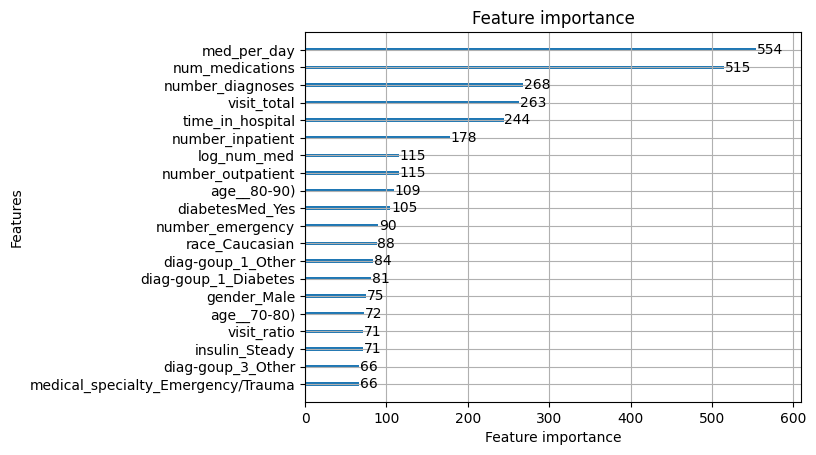

In [137]:
lgb.plot_importance(clf.best_estimator_, max_num_features=20)
plt.show()

In [138]:
lgbm_best = LGBMClassifier(subsample= 1.0, num_leaves= 31, n_estimators= 400, max_depth= 3, learning_rate= 0.05,colsample_bytree= 1.0)  # Insert best_params manually
lgbm_best.fit(x_train, y_train)
cross_val_score(lgbm_best, x_test, y_test, cv=5, scoring='roc_auc').mean()


[LightGBM] [Info] Number of positive: 37500, number of negative: 43912
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 81412, number of used features: 137
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460620 -> initscore=-0.157847
[LightGBM] [Info] Start training from score -0.157847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

np.float64(0.6585990539305758)

In [139]:
import joblib
joblib.dump(xg, "../models/xg.pkl")

['../models/xg.pkl']